## Vietnam Stock Market
 Thị trường chứng khoán Việt Nam đã tồn tại và phát triển suốt hơn 20 năm qua và đã trải qua nhiều thăng trầm. Năm 2018, thị trường đạt đỉnh lịch sử 1200 điểm để rồi 3 năm sau 2021, thị tường vượt lần lượt các mốc 120, 1400 và 1500. Với những kì vọng trước mắt thị trường được kì vọng sẽ vượt 1800 điểm vào năm 2022!





### Algorithmic Trading
Với sự phát triển của công nghệ và sự hỗ trợ của cộng động, trading bằng máy đã trở nên dễ dàng hơn bao giờ hết. Notebook này là mốc bắt đầu của một chuỗi chương trình với hy vọng sẽ đóng góp một chút công sức của mình vào sự páht triển của ngành công nghiệp trị giá rất lớn này.


#### Some words
Trước khi bắt đầu bất cứ một chương trình nào, chúng ta cần đánh giá về tiềm năng và tình khả thi của dự án. Hiện tại lượng data cung cấp cho thị trường chứng khoán Việt Nam vẫn còn rất hạn chế.
Về data, đơn vị cung cấp có VNDirect và SSI là 2 công ty chứng khoán lớn công khai cung cấp dữ liệu. Hoạt động Web scaping cũng có thể thực hiện với CafeF. 
Về intraday data, chúng ta có thể sử dụng data từ các đơn vị cung cấp API nước ngoài (mặc dù delay 15' và không đủ hết những mã chứng khoán tại thị trường Việt Nam, tuy vậy vẫn có thể áp dụng.



Về chương trình này, để tiết kiệm thời gian và công sức, mình xin sử dụng package vnquant của anh Phạm Đình Khánh, một package rất chính xác lấy nguồn data từ VNDirect và CafeF. Ngoài ra, mình đã cố gắng tìm những nguồn data miễn phí nhiều nhất có thể dành cho thị trường Việt Nam.



# Data Collection

Source data from [vnquant](https://github.com/phamdinhkhanh/vnquant) 
Another way is to use the [investpy](https://investpy.readthedocs.io), however there are lots of missing data for Vietnam

In order to run this program, please install requirements


In [109]:
#example of downloading via notebook
#Download mplfinance for plotting candlestick
!pip install mplfinance

You should consider upgrading via the '/Users/haquochung/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [1]:
#insert libraries and packages
import pandas as pd
import vnquant.DataLoader as dl
import datetime
import investpy
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
#create a function for collect price data and store it as a csv file

def load_data(symbol):
    start = '2018-01-01'
    
    #you can fix the time frame by using timedelta function of datetime library
    now = datetime.datetime.now()
    end = now.strftime("%Y-%m-%d")
    loader = dl.DataLoader(symbol, start,end, data_source='VND', minimal=True)
    data = loader.download()
    close_data = data['close'].dropna()
    
    
    #to store data remove the '#' on the following line
    #csv_file = close_data.to_csv(f'Data/ClosePrice/{symbol} historical since {start}', index=True)

    return data

In [3]:
#Use TCB as an example
data = load_data('TCB')
data

2022-02-20 21:43:07,712 : INFO : NumExpr defaulting to 8 threads.
2022-02-20 21:43:07,722 : INFO : data TCB from 2018-01-01 to 2022-02-20 have already cloned!


Attributes,high,low,open,close,avg,volume
Symbols,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,
2018-06-04,105.0,102.4,102.4,102.4,102.49,2811840.0
2018-06-05,106.0,96.0,99.1,96.0,100.19,1689500.0
2018-06-06,96.0,91.0,95.0,92.0,92.98,1901680.0
2018-06-07,98.4,93.1,94.5,98.4,97.00,1476540.0
2018-06-08,105.2,99.5,101.0,105.2,103.83,2008500.0
...,...,...,...,...,...,...
2022-02-14,53.2,51.5,53.2,51.5,52.43,21618340.0
2022-02-15,52.1,51.3,51.6,51.8,51.64,12082800.0


### Ploting
After collecting the data, we can plot price in many ways.
We can use package [mplfinance](https://github.com/matplotlib/mplfinance) for candlestick, however we can not interact with it.
Another way is to use [plotly](https://plotly.com) (vnquant do have a function to plot the candle chart by using plotly)


In [12]:
def plot_price(symbol, range):
    #format datetime
    now = datetime.datetime.now()
    end = now.strftime("%Y-%m-%d")
    begin = now - datetime.timedelta(range) #adjust timeframe by adjusting time delta
    start = begin.strftime("%Y-%m-%d")

    #extract data from vnquant
    loader = dl.DataLoader(symbol, start, end, data_source='VND', minimal=True)
    pricedata = loader.download()
    
    #format the data for the mplfinance
    stock = pricedata.copy()
    stock.reset_index(inplace = True)

    dailyInfo = pd.DataFrame( columns =['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
    dailyInfo['Date'] = stock['date']
    dailyInfo['Open'] = stock['open']
    dailyInfo['High'] = stock['high']
    dailyInfo['Low'] = stock['low']
    dailyInfo['Close'] = stock['close']
    dailyInfo['Volume'] = stock['volume']
    dailyInfo.set_index('Date', inplace= True)
    
    #plot candlestick
    mav = (20,40)
    fig, axes = mpf.plot(dailyInfo, type='candle', volume=True, mav=mav, returnfig=True, figsize = (12,6))
    title = ('%s | Candle chart in %r days') % (symbol, range)
    axes[0].set_title(title)
    axes[0].legend(mav)
    plt.show()

    
    return dailyInfo

Enter a symbol: MSN
Please choose the timeframe: 100


2022-02-20 21:47:21,819 : INFO : data MSN from 2021-11-12 to 2022-02-20 have already cloned!


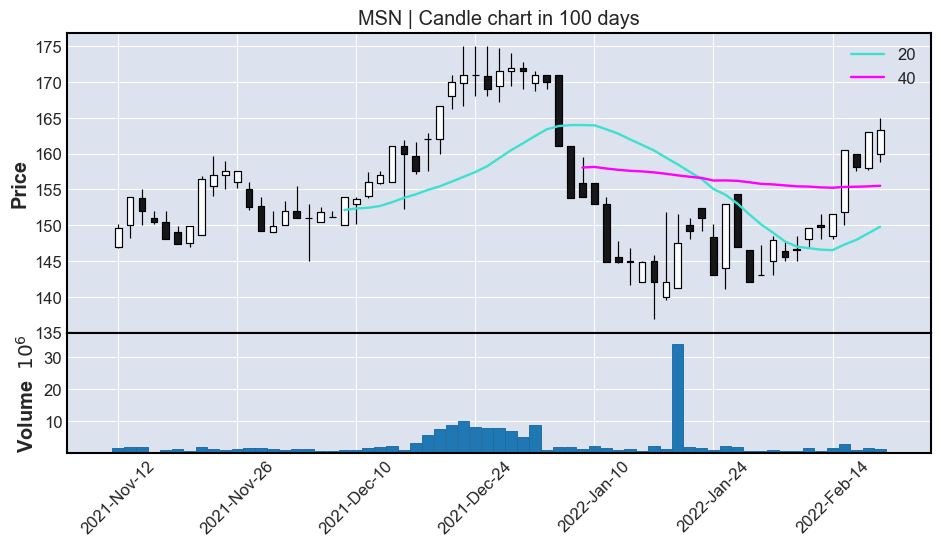

In [13]:
#Change timeframe by proving in range

symbol = input('Enter a symbol: ')
symbol = symbol.upper()

timeframe = input('Please choose the timeframe: ')
timeframe = int(timeframe)


stock = plot_price(symbol, timeframe )

#### Symbol ratio and information

Some of the information you can extract from the library [investpy](https://investpy.readthedocs.io) or write some code to get them.

Some of the basic data you want to have:

    - PE
    - Capitalization

In [10]:
stock = investpy.get_stock_information(stock = 'HAH',country = 'vietnam')
stock

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
0,HAH,77300.0,"76,000-81,500",1.650000e+12,77000.0,"18,750-81,500",5801.76,2201500.0,3.950000e+12,950.00(1.59%),1009407.0,10.86,0.75,330.32%,48782751.0,02/03/2022


In [11]:
stock['P/E Ratio']

0    10.86
Name: P/E Ratio, dtype: float64

### Get index data

Stock indices, collections of stocks designed to represent or reflect the performance of a stock market, country, region, industry, or category of stocks, are commonplace in investing. Investors frequently use indices to track and measure investment performance, and passive investment strategies that seek to replicate the indices themselves have become hugely influential in recent decades. (Seeking Alpha)

Therefore, collecing the index data and make comparision between the stock and the index is a must-have process. 
In Vietnam, there are a few major indices that are usually used by many people. For example, Vnindex is the index of the Hose exchange, HNX is the index of the HNX exchange ,VN30 is the index of the thirty biggest company in Hose, VN100, HNX30, etc.

In [174]:
#create a function to get the index data

def load_index_data(x):
    end = datetime.datetime.now()
    index =investpy.get_index_historical_data(x,country='vietnam',from_date='01/01/2015',to_date=end.strftime('%d/%m/%Y'))
    index = pd.DataFrame(index)
    return index

In [182]:
#VN is VNindex
#VN 30 is VN30 index
#VN100 is VN100 index
#HNX is HNX index
#HNX 30 is HNX30 index
VN =load_index_data('VN')
VN

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-01-05,545.43,549.22,543.78,544.45,95950,VND
2015-01-06,539.08,550.11,538.82,549.66,112316,VND
2015-01-07,548.44,555.83,548.44,552.05,111705,VND
2015-01-08,553.49,556.80,552.15,553.47,77867,VND
2015-01-09,555.53,570.52,555.53,569.73,107475,VND
...,...,...,...,...,...,...
2022-02-14,1501.71,1501.71,1471.96,1471.96,810716,VND
2022-02-15,1471.96,1495.56,1470.06,1492.75,606423,VND
2022-02-16,1492.75,1499.50,1486.68,1492.10,702522,VND


In [1]:
x = 3